In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [113]:
#Load CSV data - BEWARE: this is the entire dataset
crimes = pd.read_csv('chicago-crimes.csv')

In [4]:
#crime count since 2001
crimes.ID.count()

6756885

In [5]:
#Analyzing data format
crimes.head(4)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10000092,HY189866,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,28.0,25.0,04B,1144606.0,1903566.0,2015,02/10/2018 03:50:01 PM,41.891399,-87.744385,"(41.891398861, -87.744384567)"
1,10000094,HY190059,03/18/2015 11:00:00 PM,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,...,15.0,67.0,26,1166468.0,1860715.0,2015,02/10/2018 03:50:01 PM,41.773372,-87.665319,"(41.773371528, -87.665319468)"
2,10000095,HY190052,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,4.0,39.0,08B,1185075.0,1875622.0,2015,02/10/2018 03:50:01 PM,41.813861,-87.596643,"(41.81386068, -87.596642837)"
3,10000096,HY190054,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,40.0,08B,1178033.0,1870804.0,2015,02/10/2018 03:50:01 PM,41.800802,-87.622619,"(41.800802415, -87.622619343)"


In [115]:
#droping unnecessary columns
crimes.drop(columns=['ID','Case Number','Block','IUCR','FBI Code','X Coordinate','Y Coordinate','Latitude','Longitude','Location','Updated On','Ward'], inplace=True)
crimes.head(4)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,Year
0,03/18/2015 07:44:00 PM,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,11.0,25.0,2015
1,03/18/2015 11:00:00 PM,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,7.0,67.0,2015
2,03/18/2015 10:45:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,2.0,39.0,2015
3,03/18/2015 10:30:00 PM,BATTERY,SIMPLE,APARTMENT,False,False,225,2.0,40.0,2015


In [116]:
#Setting index for the data. This is done for timeseries analysis
date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')
crimes.index = pd.DatetimeIndex(date)

In [117]:
#Drop date column since it is now the index (redundant column). Let's see the new format of the data
crimes.drop(columns=['Date'], inplace=True)
crimes.head(4)

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,Year
Date,,,,,,,,,
2015-03-18 19:44:00,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,11.0,25.0,2015
2015-03-18 23:00:00,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,7.0,67.0,2015
2015-03-18 22:45:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,2.0,39.0,2015
2015-03-18 22:30:00,BATTERY,SIMPLE,APARTMENT,False,False,225,2.0,40.0,2015


In [122]:
#Filter out data that is earlier than 2008 and greater than october 2018
#We are excluding november because it is incomplete (november 20, 2018 is the most recent data)
#This leaves us with 3,483,258 records
crimes_november = crimes['2018-11']
crimes_before_2008 = crimes[crimes.Year < 2008]
crimes = crimes['2008-01-01 00:00:00':'2018-10-31 23:59:59']
crimes.Description.count()

3483258

In [120]:
#Crimes so far in november 2018 ...
crimes_november.Description.count()

17000

In [121]:
#crimes that happened before 2008
#Verifying that numbers match => 3483258 + 17000 + 3256627 = 6756885
crimes_before_2008.Description.count()

3256627

In [55]:
#here we can see the following:
# - Primary Type has 33 different values, the top (most common) one being THEFT
# - Description has 361 different values, the top being SIMPLE
# - Out of the 3 million crimes, 3483258 - 2590901 = 892,357 resulted in arrests
crimes.describe(include='all')

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Community Area,Year
count,3483258,3483258,3479188,3483258,3483258,3.483258e+06,3.483217e+06,3.482397e+06,3.483258e+06
unique,33,361,164,2,2,NaN,NaN,NaN,NaN
top,THEFT,SIMPLE,STREET,False,False,NaN,NaN,NaN,NaN
freq,767207,358614,826180,2590901,2980590,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.174201e+03,1.129755e+01,3.755004e+01,2.012408e+03
std,NaN,NaN,NaN,NaN,NaN,6.996256e+02,6.935027e+00,2.153592e+01,3.143409e+00
min,NaN,NaN,NaN,NaN,NaN,1.110000e+02,1.000000e+00,0.000000e+00,2.008000e+03
25%,NaN,NaN,NaN,NaN,NaN,6.210000e+02,6.000000e+00,2.300000e+01,2.010000e+03
50%,NaN,NaN,NaN,NaN,NaN,1.032000e+03,1.000000e+01,3.200000e+01,2.012000e+03
75%,NaN,NaN,NaN,NaN,NaN,1.723000e+03,1.700000e+01,5.700000e+01,2.015000e+03


In [57]:
#Top 8 crimes types overall
crimes['Primary Type'].value_counts().head(8)

THEFT                 767207
BATTERY               623516
CRIMINAL DAMAGE       385364
NARCOTICS             330240
ASSAULT               217331
OTHER OFFENSE         213110
BURGLARY              211623
DECEPTIVE PRACTICE    165571
Name: Primary Type, dtype: int64

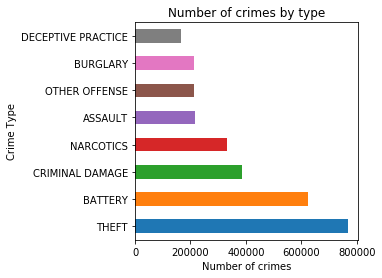

In [61]:
#Visualize data from before
plt.figure(figsize=(4,4))
crimes['Primary Type'].value_counts().head(8).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

In [63]:
#Top 8 crime location
crimes['Location Description'].value_counts().head(8)

STREET                            826180
RESIDENCE                         574201
APARTMENT                         422171
SIDEWALK                          375232
OTHER                             128723
PARKING LOT/GARAGE(NON.RESID.)    100285
ALLEY                              75918
SMALL RETAIL STORE                 67209
Name: Location Description, dtype: int64

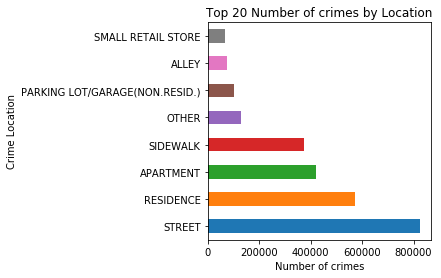

In [62]:
#Visualize data from before
plt.figure(figsize=(4,4))
crimes['Location Description'].value_counts().head(8).plot(kind='barh')
plt.title('Top 20 Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

In [66]:
#Top 8 crime descriptions
crimes['Description'].value_counts().head(8)

SIMPLE                          358614
DOMESTIC BATTERY SIMPLE         304260
$500 AND UNDER                  283775
TO VEHICLE                      186918
OVER $500                       185611
TO PROPERTY                     175467
POSS: CANNABIS 30GMS OR LESS    147255
FORCIBLE ENTRY                  138337
Name: Description, dtype: int64

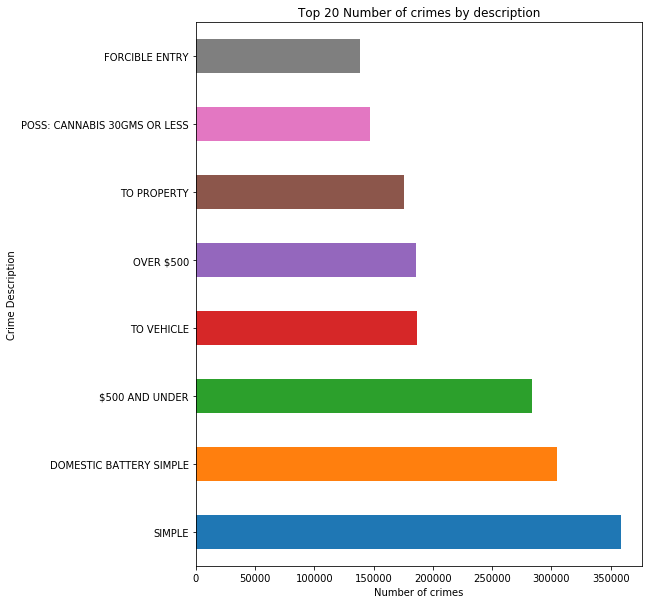

In [65]:
#Top 8 crime descriptions visualization
plt.figure(figsize=(8,10))
crimes['Description'].value_counts().head(8).plot(kind='barh')
plt.title('Top 20 Number of crimes by description')
plt.ylabel('Crime Description')
plt.xlabel('Number of crimes')
plt.show()

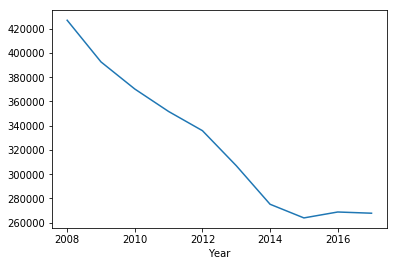

In [21]:
#Visualization of crimes by year.
#We exclud 2018 because data is not complete for this year
by_year = crimes.groupby([crimes.Year]).size().head(10).plot()

In [26]:
#Group crimes by month - excluding november 2018
monthly_crimes = crimes.resample('M').size().head(129)

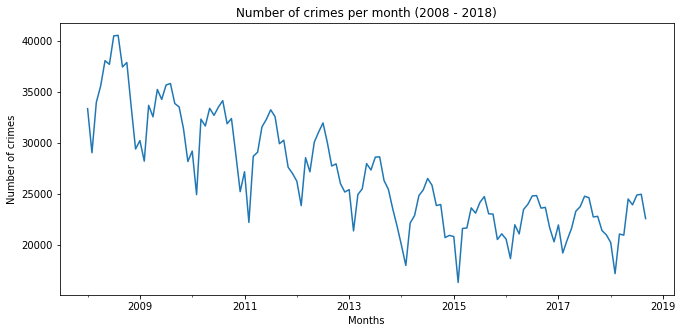

In [28]:
plt.figure(figsize=(11,5))
monthly_crimes.plot(legend=False)
plt.title('Number of crimes per month (2008 - 2018)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

In [59]:
#Digging into the data, we notice that for every year, there's a surge of crimes during
#summer months - May to September, being July usually the one with most crime
monthly_crimes.head(24)

Date
2008-01-31    33360
2008-02-29    29042
2008-03-31    33973
2008-04-30    35592
2008-05-31    38062
2008-06-30    37697
2008-07-31    40489
2008-08-31    40537
2008-09-30    37444
2008-10-31    37878
2008-11-30    33555
2008-12-31    29410
2009-01-31    30231
2009-02-28    28225
2009-03-31    33683
2009-04-30    32562
2009-05-31    35238
2009-06-30    34265
2009-07-31    35673
2009-08-31    35824
2009-09-30    33866
2009-10-31    33527
2009-11-30    31387
2009-12-31    28184
Freq: M, dtype: int64

In [70]:
#Analyzing daily crimes
daily_crime = crimes.resample('D').size()

In [95]:
#Here we are analyzing the most violent day of each year
#For some reason, it seems to be January 1st for each year,
#except 2018 in whic it is May first.
topdays = [
    daily_crime['2008'].nlargest(1),
    daily_crime['2009'].nlargest(1),
    daily_crime['2010'].nlargest(1),
    daily_crime['2011'].nlargest(1),
    daily_crime['2012'].nlargest(1),
    daily_crime['2013'].nlargest(1),
    daily_crime['2014'].nlargest(1),
    daily_crime['2015'].nlargest(1),
    daily_crime['2016'].nlargest(1),
    daily_crime['2017'].nlargest(1),
    daily_crime['2018'].nlargest(1)
]
described = []

for t in topdays:
    described.append([t.index[0], t[0]])
described

[[Timestamp('2008-01-01 00:00:00', freq='D'), 1801],
 [Timestamp('2009-01-01 00:00:00', freq='D'), 1818],
 [Timestamp('2010-01-01 00:00:00', freq='D'), 1421],
 [Timestamp('2011-01-01 00:00:00', freq='D'), 1531],
 [Timestamp('2012-01-01 00:00:00', freq='D'), 1494],
 [Timestamp('2013-01-01 00:00:00', freq='D'), 1358],
 [Timestamp('2014-01-01 00:00:00', freq='D'), 1148],
 [Timestamp('2015-01-01 00:00:00', freq='D'), 1160],
 [Timestamp('2016-01-01 00:00:00', freq='D'), 1052],
 [Timestamp('2017-01-01 00:00:00', freq='D'), 1101],
 [Timestamp('2018-05-01 00:00:00', freq='D'), 959]]

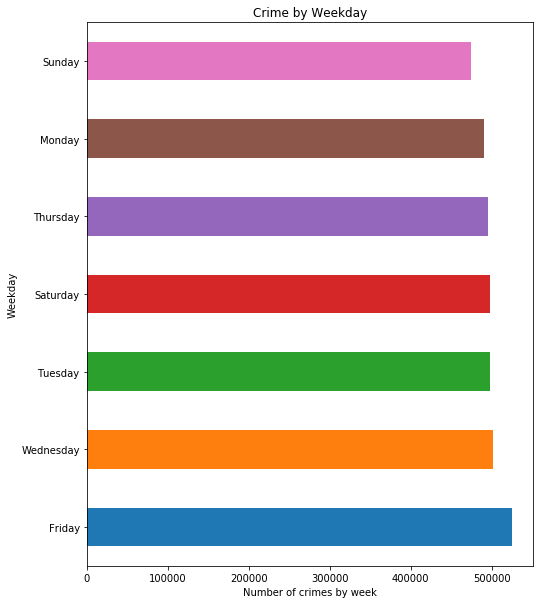

In [105]:
plt.figure(figsize=(8,10))
crimes.index.weekday_name.value_counts().sort_values(ascending=False).plot(kind='barh')
plt.title('Crime by Weekday')
plt.ylabel('Weekday')
plt.xlabel('Number of crimes by week')
plt.show()

In [130]:
#Now we'll try to predict the number of crimes for november 2018
november = crimes[crimes.index.month == 11].groupby('Year').size()
november

Year
2008    33555
2009    31387
2010    28881
2011    27627
2012    26022
2013    23545
2014    20734
2015    20548
2016    21693
2017    21425
dtype: int64

In [134]:
pd.stats.ols.MovingOLS(x=november.index, y=november[0])

AttributeError: module 'pandas' has no attribute 'ols'